In [0]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [8]:
dataframe = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')
dataframe.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [9]:
dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


our target class i.e. 'purchased' contains only two values 0 & 1. As these are two discrete values and also they are categorical we'll need to use classifications model. 
we will drop user id and gender column for this task

```
# This is formatted as code
```



In [10]:
dataframe = dataframe.drop(columns=['User ID','Gender'])
dataframe

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


visualizing data

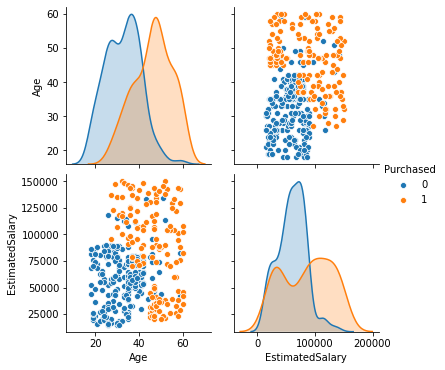

In [11]:
sns.pairplot(dataframe, hue='Purchased')

by seeing the above graphs we can tell that users with low age and low income
wont purcahse and users with high income high age are more likely to purcahse
lets define and train our model. But first we have to split the data for training and testing.


In [0]:
y = dataframe.iloc[:,2]
x = dataframe.drop(columns='Purchased')

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

using model for prediction and testing accuracy

In [15]:
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8375

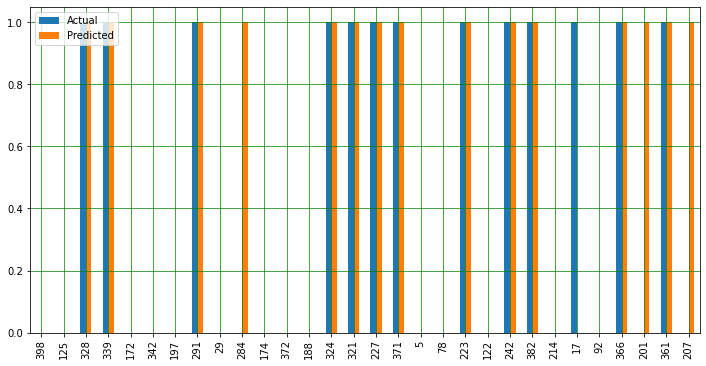

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(30)
df1.plot(kind='bar',figsize=(12,6))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.7', color='black')
plt.show()

trying with logistic regression


In [0]:
model2=LogisticRegression(random_state=0).fit(x_train,y_train)


In [24]:
y_pred2=model2.predict(x_test)
accuracy_score(y_pred2,y_test)

0.6

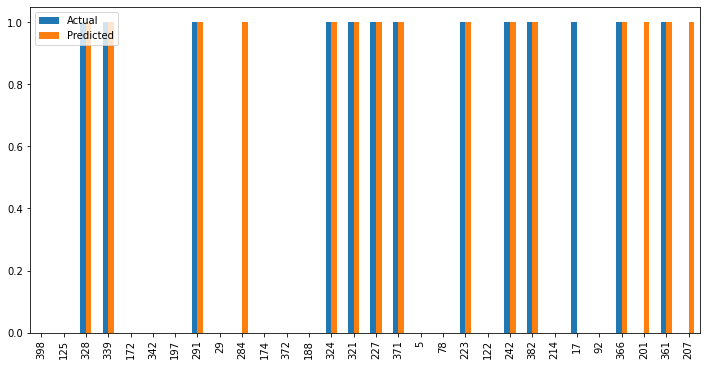

In [26]:
df2=pd.DataFrame=({'Actual':y_test,'Predicted':y_pred2})
df2=df.head(30)
df2.plot(kind='bar',figsize=(12,6))
plt.show()